<a href="https://colab.research.google.com/github/anjanadevi05/Defect_Detection/blob/main/defect_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Defect detection using deeplearning models***



# IMPORTING LIBRARIES

In [ ]:
import os
from os import path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

# DATA LOADING

In [ ]:
import zipfile
import os

filename = '/content/casting_data.zip'
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')
os.listdir('extracted_folder')


['casting_data']

In [ ]:
import os

my_data_dir = '/content/extracted_folder/casting_data/'
train_path = os.path.join(my_data_dir, 'train')
test_path = os.path.join(my_data_dir, 'test')

# Parameters for image processing
image_shape = (300, 300, 1)
batch_size = 32
print("Train directory contents:", os.listdir(train_path))
print("Test directory contents:", os.listdir(test_path))


Train directory contents: ['ok_front', 'def_front']
Test directory contents: ['ok_front', 'def_front']


# DATA PREPROCESSING

In [ ]:
image_gen = ImageDataGenerator(rotation_range=75,
                               width_shift_range=0,
                               height_shift_range=0,
                               rescale=1/255,
                               shear_range=0,
                               zoom_range=0,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [ ]:
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [ ]:
model = Sequential()

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

# CNN


In [ ]:
cnn = Sequential()

cnn.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())

cnn.add(Dense(224))
cnn.add(Activation('relu'))
# Last layer
cnn.add(Dense(1))
cnn.add(Activation('sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
import time
start_time = time.time()
results = cnn.fit(train_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])
end_time = time.time()
training_time = end_time - start_time
print(f"Total Training Time: {training_time} seconds")

Epoch 1/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 66s 273ms/step - accuracy: 0.6835 - loss: 0.5757 - val_accuracy: 0.8042 - val_loss: 0.3440
Epoch 2/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 72s 254ms/step - accuracy: 0.9053 - loss: 0.2343 - val_accuracy: 0.9273 - val_loss: 0.1687
Epoch 3/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 54s 252ms/step - accuracy: 0.9707 - loss: 0.0922 - val_accuracy: 0.9916 - val_loss: 0.0351
Epoch 4/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 83s 251ms/step - accuracy: 0.9778 - loss: 0.0696 - val_accuracy: 0.9916 - val_loss: 0.0265
Epoch 5/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 54s 255ms/step - accuracy: 0.9901 - loss: 0.0395 - val_accuracy: 0.9930 - val_loss: 0.0185
Epoch 6/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 81s 251ms/step - accuracy: 0.9925 - loss: 0.0324 - val_accuracy: 0.9483 - val_loss: 0.1064
Epoch 7/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 54s 252ms/step - accuracy: 0.9918 - loss: 0.0263 - val_accuracy: 0.9958 - val_loss: 0.0183
Epoch 8/20
208/208 ━━━━━━━━━━━━━━━━━━━━ 54s 252ms/step - accuracy: 0.9889 - loss: 0

In [ ]:
# Evaluate the model on the test data
loss, accuracy = cnn.evaluate(test_set)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.9993 - loss: 0.0017
Test Accuracy: 99.86%


In [ ]:
# Predict the test data
test_set.reset()
y_true = test_set.classes
y_pred_prob = cnn.predict(test_set)
y_pred = np.where(y_pred_prob > 0.5, 1, 0).reshape(-1)
print(classification_report(y_true, y_pred, target_names=['OK', 'Defective']))

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step
              precision    recall  f1-score   support

          OK       1.00      1.00      1.00       453
   Defective       1.00      1.00      1.00       262

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



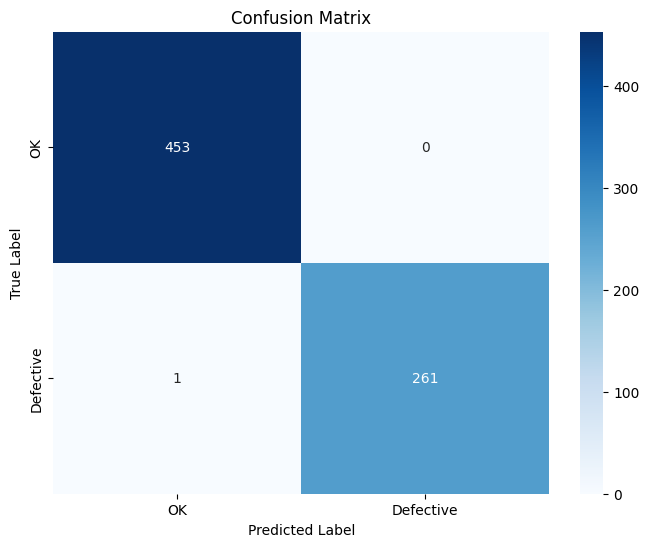

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['OK', 'Defective'], yticklabels=['OK', 'Defective'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

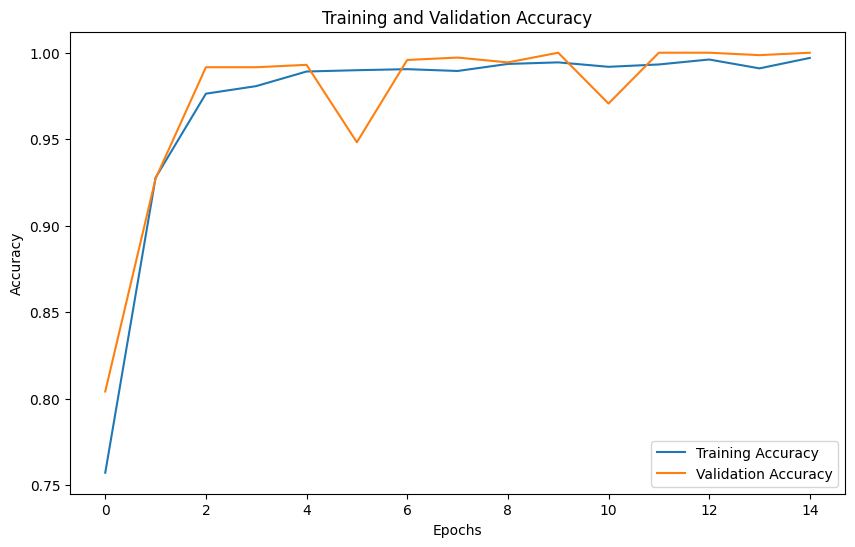

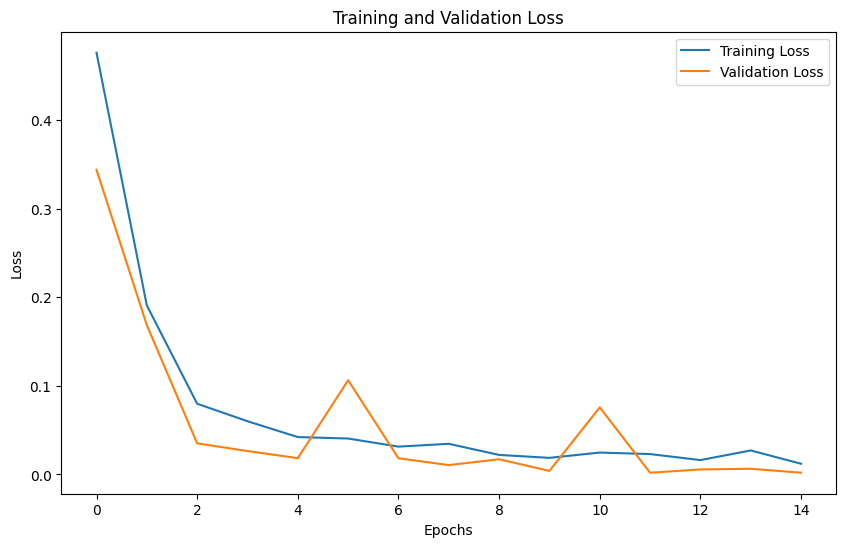

In [ ]:
losses = pd.DataFrame(results.history)

# Plot accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(losses['accuracy'], label='Training Accuracy')
plt.plot(losses['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(losses['loss'], label='Training Loss')
plt.plot(losses['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MODEL PREDICTION USING DASH

In [ ]:
cnn.save('casting_model.h5')

In [ ]:
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = load_model('casting_model.h5')

In [ ]:
!pip install dash
!pip install dash-bootstrap-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Save this as app.py
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import base64
import io
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import dash_bootstrap_components as dbc

# Load your trained CNN model
model = load_model('/content/casting_model.h5')

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = dbc.Container([
    dbc.Row(
        dbc.Col(
            html.H1("Casting Product Defect Detection", className="text-center my-3"),
            width=12
        )
    ),

    dbc.Row(
        dbc.Col(
            dcc.Upload(
                id='upload-image',
                children=html.Div([
                    'Drag and Drop or ',
                    html.A('Select Files')
                ]),
                style={
                    'width': '100%',
                    'height': '60px',
                    'lineHeight': '60px',
                    'borderWidth': '1px',
                    'borderStyle': 'dashed',
                    'borderRadius': '5px',
                    'textAlign': 'center',
                    'margin': '10px'
                },
                multiple=False
            ),
            width=12
        )
    ),

    dbc.Row(
        dbc.Col(
            html.Div(id='output-image', className="text-center my-3"),
            width=12
        )
    ),

    dbc.Row(
        dbc.Col(
            html.H3(id='prediction-result', className="text-center my-3"),
            width=12
        )
    )
])

def preprocess_image(image, target_size):
    img = image.convert('L')
    img = img.resize(target_size[:2])
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img


# Define callback to update UI after image upload
@app.callback(
    [Output('output-image', 'children'),
     Output('prediction-result', 'children')],
    [Input('upload-image', 'contents')]
)
def update_output(content):
    if content is not None:
        content_type, content_string = content.split(',')
        decoded = base64.b64decode(content_string)
        image = Image.open(io.BytesIO(decoded))
        processed_image = preprocess_image(image, (300, 300, 1))
        prediction = model.predict(processed_image)
        result = "OK" if prediction[0][0] >= 0.5 else "Defective"
        display_image = html.Img(src=content, style={'width': '300px', 'height': '300px'})
        return display_image, f"Prediction: **{result}**"
    else:
        return None, None


if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

# ResNet


In [ ]:
!pip install transformers torch


In [ ]:
from transformers import ResNetForImageClassification, AutoImageProcessor
from tensorflow.keras.optimizers import Adam
from transformers import AdamW
from torchvision import transforms
import torch
import numpy as np
from PIL import Image
import tensorflow as tf

In [ ]:
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
resnet_model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50", num_labels=2, ignore_mismatched_sizes = True)

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of ResNetForImageClassification were not initialized from the model checkpoint at microsoft/resnet-50 and are newly initialized because the shapes did not match:
- classifier.1.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.1.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([2, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import os

class ResNetDataGenerator(Dataset):
    def __init__(self, image_directory, processor):
        self.image_directory = image_directory
        self.processor = processor
        self.image_files = []
        self.labels = []

        for label, sub_dir in enumerate(['def_front', 'ok_front']):
            sub_dir_path = os.path.join(self.image_directory, sub_dir)
            if os.path.exists(sub_dir_path):
                for file in os.listdir(sub_dir_path):
                    file_path = os.path.join(sub_dir_path, file)
                    if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                        self.image_files.append(file_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        label = self.labels[idx]

        image = Image.open(image_path).convert("RGB")
        inputs = self.processor(images=image, return_tensors="pt")

        return inputs['pixel_values'].squeeze(0), torch.tensor(label)


In [ ]:
from torch.utils.data import DataLoader

train_directory = '/content/extracted_folder/casting_data/train'
test_directory = '/content/extracted_folder/casting_data/test'

# Create instances of the data generator
train_data_gen = ResNetDataGenerator(train_directory, processor)
test_data_gen = ResNetDataGenerator(test_directory, processor)

train_loader = DataLoader(train_data_gen, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data_gen, batch_size=32, shuffle=False)


In [ ]:
import torch.optim as optim
from tqdm import tqdm
import torch.nn as nn
import time as time

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model.to(device)

# Define optimizer
optimizer = optim.AdamW(resnet_model.parameters(), lr=5e-5)

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=3, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.best_loss = None
        self.counter = 0

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                return True  # Stop training
        else:
            self.best_loss = val_loss
            self.counter = 0
        return False  # Continue training

# Create an instance of EarlyStopping
early_stopping = EarlyStopping(patience=3, verbose=True)

# Training loop
num_epochs = 5
start_training_time = time.time()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    resnet_model.train()
    total_loss = 0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = resnet_model(images).logits
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(avg_loss)
    train_accuracies.append(train_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

    resnet_model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet_model(images).logits
            loss = nn.CrossEntropyLoss()(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    # Check for early stopping
    if early_stopping(val_loss):
        print("Early stopping triggered")
        break  # Stop training

end_training_time = time.time()
total_training_time = end_training_time - start_training_time
print(f'Total Training Time: {total_training_time:.2f} seconds')


100%|██████████| 208/208 [01:37<00:00,  2.14it/s]


Epoch [1/5], Loss: 0.4301, Accuracy: 87.22%
Validation Loss: 0.0981, Validation Accuracy: 99.16%


100%|██████████| 208/208 [01:34<00:00,  2.21it/s]


Epoch [2/5], Loss: 0.0536, Accuracy: 99.19%
Validation Loss: 0.0468, Validation Accuracy: 99.30%


100%|██████████| 208/208 [01:37<00:00,  2.14it/s]


Epoch [3/5], Loss: 0.0237, Accuracy: 99.49%
Validation Loss: 0.0166, Validation Accuracy: 99.72%


100%|██████████| 208/208 [01:34<00:00,  2.20it/s]


Epoch [4/5], Loss: 0.0129, Accuracy: 99.70%
Validation Loss: 0.0118, Validation Accuracy: 99.58%


100%|██████████| 208/208 [01:36<00:00,  2.16it/s]


Epoch [5/5], Loss: 0.0128, Accuracy: 99.65%
Validation Loss: 0.0103, Validation Accuracy: 99.72%
Total Training Time: 505.62 seconds


In [ ]:
# Set the model to evaluation mode
resnet_model.eval()

# Initialize variables to track the correct predictions and total samples
correct_predictions = 0
total_samples = 0
start_inference_time = time.time()

# Disable gradient calculation for efficiency
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  # Move to GPU if available

        outputs = resnet_model(images).logits  # Get model outputs
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        total_samples += labels.size(0)  # Update total samples
        correct_predictions += (predicted == labels).sum().item()  # Count correct predictions

# Calculate test accuracy
test_accuracy = correct_predictions / total_samples
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

end_inference_time = time.time()
total_inference_time = end_inference_time - start_inference_time
print(f'Total Inference Time: {total_inference_time:.2f} seconds')

Test Accuracy: 99.72%
Total Inference Time: 5.96 seconds


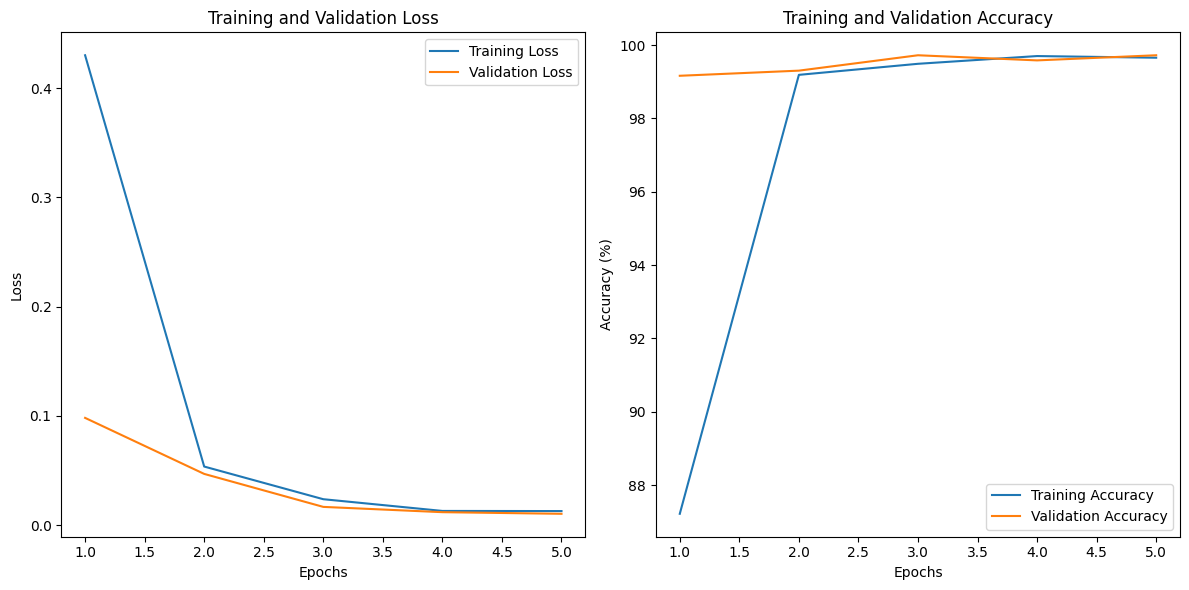

In [ ]:
# Plotting Loss and Accuracy
epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate model for precision, recall, F1-score, confusion matrix
y_true = []
y_pred = []

resnet_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet_model(images).logits
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print classification report
print(classification_report(y_true, y_pred, target_names=['OK', 'Defective']))

              precision    recall  f1-score   support

          OK       1.00      1.00      1.00       453
   Defective       0.99      1.00      1.00       262

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



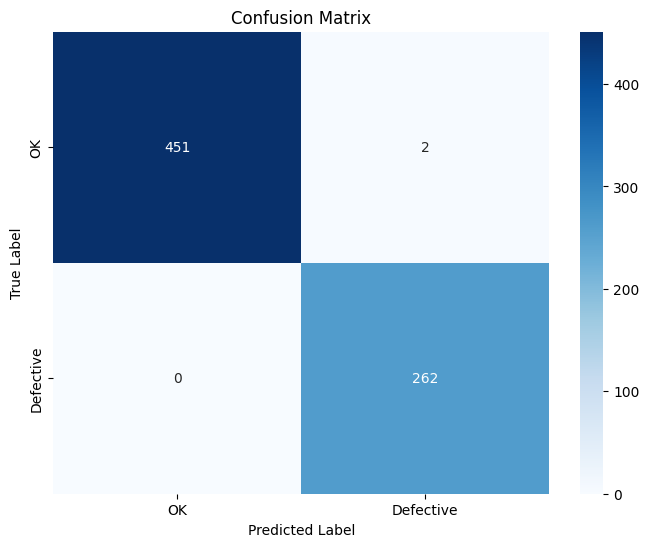

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['OK', 'Defective'], yticklabels=['OK', 'Defective'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Xception

In [ ]:
!pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.4 MB/s eta 0:00:00


In [ ]:
import timm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

In [ ]:
xception_model = timm.create_model('xception', pretrained=True, num_classes=2)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth" to /root/.cache/torch/hub/checkpoints/xception-43020ad28.pth


In [ ]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xception_model.to(device)

Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

In [ ]:
# Define a data generator class
class XceptionDataGenerator(Dataset):
    def __init__(self, image_directory, transform=None):
        self.image_directory = image_directory
        self.transform = transform
        self.image_files = []
        self.labels = []

        for label, sub_dir in enumerate(['def_front', 'ok_front']):
            sub_dir_path = os.path.join(self.image_directory, sub_dir)
            if os.path.exists(sub_dir_path):
                for file in os.listdir(sub_dir_path):
                    file_path = os.path.join(sub_dir_path, file)
                    if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                        self.image_files.append(file_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        label = self.labels[idx]

        # Open image
        image = Image.open(image_path).convert("RGB")

        # Apply transformations (resize, normalize, etc.)
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)

In [ ]:
# Define transformations (resize, normalize)
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # Xception expects 299x299 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
# Set up dataset and dataloader
train_directory = '/content/extracted_folder/casting_data/train'
test_directory = '/content/extracted_folder/casting_data/test'

train_data_gen = XceptionDataGenerator(train_directory, transform=transform)
test_data_gen = XceptionDataGenerator(test_directory, transform=transform)

train_loader = DataLoader(train_data_gen, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data_gen, batch_size=32, shuffle=False)


In [ ]:
import timm
import torch.nn as nn

# Load the Xception model from timm
xception_model= timm.create_model('xception', pretrained=True, num_classes=2)

# Check the model structure
print(xception_model)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(xception_model.parameters(), lr=5e-5)  # Ensure that model is not a Sequential
criterion = nn.CrossEntropyLoss()


Xception(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): SeparableConv2d(
        (conv1): Conv

In [ ]:
import time  # Import time for tracking duration
import torch.optim as optim
from tqdm import tqdm
import torch.nn as nn

# Track start time of the training process
start_time = time.time()

# Move model to the appropriate device
xception_model.to(device)

# Training loop
num_epochs = 5

# Initialize best_loss with a large value
best_loss = float('inf')

patience_counter = 0

for epoch in range(num_epochs):
    xception_model.train()
    total_loss = 0
    correct_train = 0
    total_train_samples = 0

    # Training step
    for images, labels in tqdm(train_loader, desc=f'Training Epoch {epoch + 1}/{num_epochs}'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = xception_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Accuracy calculation
        _, predicted = torch.max(outputs, 1)
        total_train_samples += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train_samples

    train_losses.append(avg_loss)
    train_accuracies.append(train_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy * 100:.2f}%')

    # Validation step
    xception_model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val_samples = 0

    val_preds = []
    val_targets = []

    with torch.no_grad():
        for val_images, val_labels in tqdm(test_loader, desc='Validating'):
            val_images, val_labels = val_images.to(device), val_labels.to(device)

            val_outputs = xception_model(val_images)
            val_loss = criterion(val_outputs, val_labels)
            total_val_loss += val_loss.item()

            # Accuracy calculation
            _, predicted = torch.max(val_outputs, 1)
            total_val_samples += val_labels.size(0)
            correct_val += (predicted == val_labels).sum().item()

            # Store predictions and actual labels for confusion matrix and classification report
            val_preds.extend(predicted.cpu().numpy())
            val_targets.extend(val_labels.cpu().numpy())

    avg_val_loss = total_val_loss / len(test_loader)
    val_accuracy = correct_val / total_val_samples

    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%')

    # Early stopping logic
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        patience_counter = 0  # Reset patience counter
        print("Model improved, saving the model...")
    else:
        patience_counter += 1
        print(f'EarlyStopping counter: {patience_counter} out of {num_epochs}')

        if patience_counter >= num_epochs:
            print("Early stopping triggered.")
            break

# Track end time of the

Training Epoch 1/5: 100%|██████████| 208/208 [03:14<00:00,  1.07it/s]


Epoch [1/5], Training Loss: 0.0160, Training Accuracy: 99.61%


Validating: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]


Validation Loss: 0.0106, Validation Accuracy: 99.72%
Model improved, saving the model...


Training Epoch 2/5: 100%|██████████| 208/208 [03:14<00:00,  1.07it/s]


Epoch [2/5], Training Loss: 0.0079, Training Accuracy: 99.79%


Validating: 100%|██████████| 23/23 [00:08<00:00,  2.81it/s]


Validation Loss: 0.0092, Validation Accuracy: 99.72%
Model improved, saving the model...


Training Epoch 3/5: 100%|██████████| 208/208 [03:14<00:00,  1.07it/s]


Epoch [3/5], Training Loss: 0.0063, Training Accuracy: 99.77%


Validating: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]


Validation Loss: 0.0094, Validation Accuracy: 99.72%
EarlyStopping counter: 1 out of 5


Training Epoch 4/5: 100%|██████████| 208/208 [03:13<00:00,  1.08it/s]


Epoch [4/5], Training Loss: 0.0030, Training Accuracy: 99.91%


Validating: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]


Validation Loss: 0.0116, Validation Accuracy: 99.58%
EarlyStopping counter: 2 out of 5


Training Epoch 5/5: 100%|██████████| 208/208 [03:13<00:00,  1.08it/s]


Epoch [5/5], Training Loss: 0.0022, Training Accuracy: 99.97%


Validating: 100%|██████████| 23/23 [00:08<00:00,  2.83it/s]

Validation Loss: 0.0193, Validation Accuracy: 99.58%
EarlyStopping counter: 3 out of 5


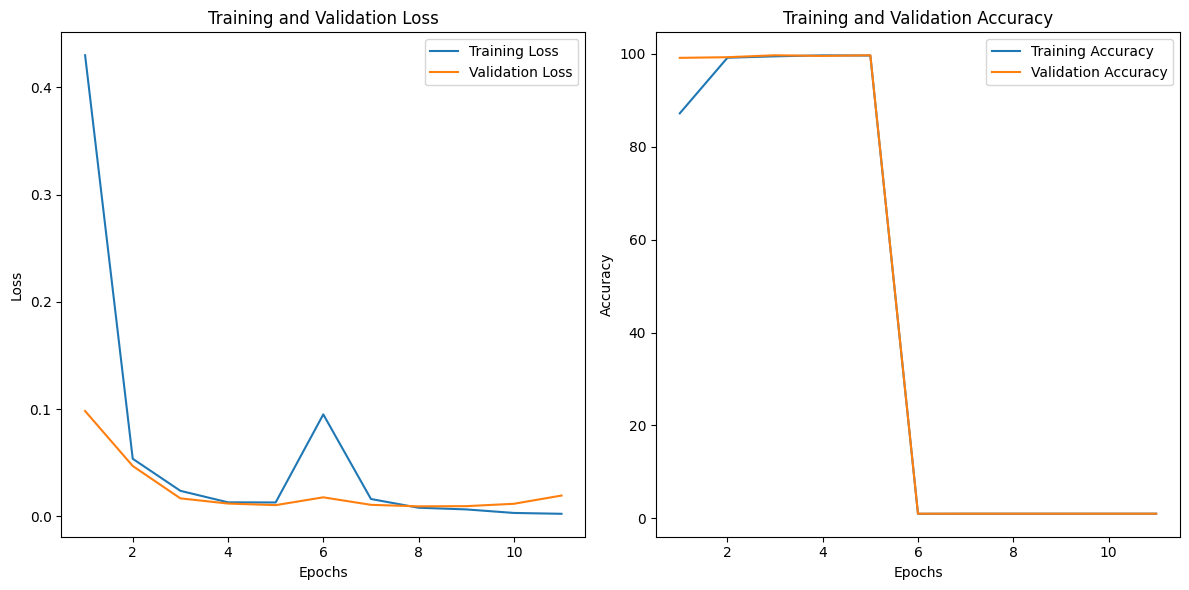

In [ ]:
# Plotting Loss and Accuracy graphs
epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 6))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Confusion Matrix and Classification Report
print("\nClassification Report:\n")
print(classification_report(val_targets, val_preds))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       0.99      1.00      0.99       262

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



Confusion Matrix:


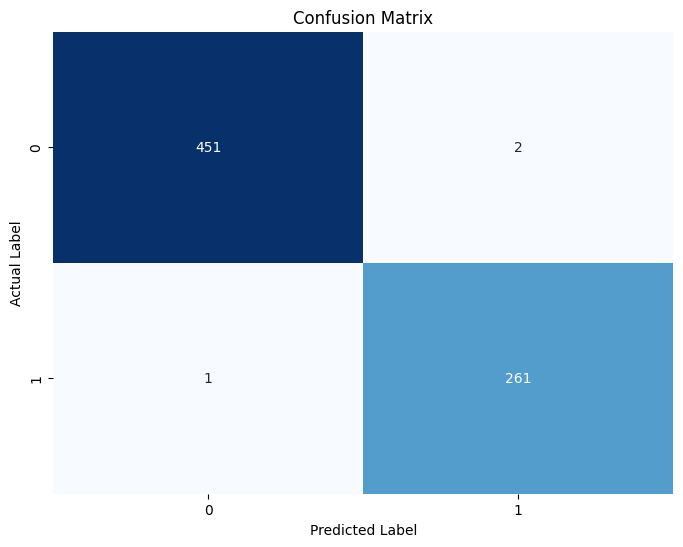

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(val_targets, val_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Testing loop
xception_model.eval()  # Set the model to evaluation mode
total_test_loss = 0
correct_predictions = 0
total_samples = 0

with torch.no_grad():  # Disable gradient calculation for testing
    for test_images, test_labels in tqdm(test_loader, desc='Testing'):
        test_images, test_labels = test_images.to(device), test_labels.to(device)

        # Get model outputs
        test_outputs = xception_model(test_images)

        # Calculate loss
        test_loss = criterion(test_outputs, test_labels)
        total_test_loss += test_loss.item()

        # Get predicted classes
        _, predicted = torch.max(test_outputs, 1)
        total_samples += test_labels.size(0)
        correct_predictions += (predicted == test_labels).sum().item()

# Calculate average test loss and accuracy
avg_test_loss = total_test_loss / len(test_loader)
test_accuracy = correct_predictions / total_samples

print(f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')


Testing: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]

Test Loss: 0.0193, Test Accuracy: 99.58%


# GoogLeNet

In [ ]:
import timm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os

In [ ]:
GoogleNet_model = models.googlenet(pretrained=True)
num_ftrs = GoogleNet_model.fc.in_features
GoogleNet_model.fc = nn.Linear(num_ftrs, 2)

GoogleNet_model = GoogleNet_model.to(device)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 39.2MB/s]


In [ ]:
# Define a data generator class
class GoogleNetDataGenerator(Dataset):
    def __init__(self, image_directory, transform=None):
        self.image_directory = image_directory
        self.transform = transform
        self.image_files = []
        self.labels = []

        for label, sub_dir in enumerate(['def_front', 'ok_front']):
            sub_dir_path = os.path.join(self.image_directory, sub_dir)
            if os.path.exists(sub_dir_path):
                for file in os.listdir(sub_dir_path):
                    file_path = os.path.join(sub_dir_path, file)
                    if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                        self.image_files.append(file_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        label = self.labels[idx]

        # Open image
        image = Image.open(image_path).convert("RGB")

        # Apply transformations (resize, normalize, etc.)
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # GoogLeNet expects 224x224 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
# Set up dataset and dataloader
train_directory = '/content/extracted_folder/casting_data/train'
test_directory = '/content/extracted_folder/casting_data/test'

train_data_gen = XceptionDataGenerator(train_directory, transform=transform)
test_data_gen = XceptionDataGenerator(test_directory, transform=transform)

train_loader = DataLoader(train_data_gen, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data_gen, batch_size=32, shuffle=False)

In [ ]:
# Define optimizer and loss function
optimizer = torch.optim.AdamW(GoogleNet_model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

In [ ]:
import torch
import time  # Import time module for tracking training time

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print("Early stopping triggered.")

# Initialize early stopping
early_stopping = EarlyStopping(patience=3, verbose=True)

# Track the start time of the training
start_time = time.time()

# Training loop with early stopping
num_epochs = 20
for epoch in range(num_epochs):
    GoogleNet_model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    # Training
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = GoogleNet_model(images)

        # Calculate loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    avg_loss = total_loss / len(train_loader)
    avg_accuracy = total_correct / total_samples * 100

    train_losses.append(avg_loss)
    train_accuracies.append(avg_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.2f}%')

    # Validation phase
    GoogleNet_model.eval()  # Set model to evaluation mode
    val_loss = 0
    val_correct = 0
    val_samples = 0

    val_preds = []
    val_targets = []

    with torch.no_grad():  # Disable gradient calculation for validation
        for val_images, val_labels in test_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            # Use GoogleNet_model instead of model
            val_outputs = GoogleNet_model(val_images)
            loss = criterion(val_outputs, val_labels)
            val_loss += loss.item()

            _, val_predicted = torch.max(val_outputs, 1)
            val_correct += (val_predicted == val_labels).sum().item()
            val_samples += val_labels.size(0)

            # Move predictions and labels to CPU before converting to NumPy
            val_preds.extend(val_predicted.cpu().numpy())
            val_targets.extend(val_labels.cpu().numpy())

    # Calculate the average validation loss and accuracy for this epoch
    avg_val_loss = val_loss / len(test_loader)
    avg_val_accuracy = val_correct / val_samples * 100

    # Append validation metrics to their lists
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy)

    print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_accuracy:.2f}%')

    # Check for early stopping
    early_stopping(avg_val_loss)

    if early_stopping.early_stop:
        print("Early stopping invoked. Training has stopped.")
        break

# Track the end time of the training and calculate the total time taken
end_time = time.time()
total_training_time = end_time - start_time

print(f'Total Training Time: {total_training_time:.2f} seconds')

Epoch 1/20: 100%|██████████| 208/208 [00:42<00:00,  4.86it/s]


Epoch [1/20], Loss: 0.0007, Accuracy: 99.98%
Validation Loss: 0.0062, Validation Accuracy: 99.72%


Epoch 2/20: 100%|██████████| 208/208 [00:42<00:00,  4.88it/s]


Epoch [2/20], Loss: 0.0002, Accuracy: 100.00%
Validation Loss: 0.0090, Validation Accuracy: 99.72%


Epoch 3/20: 100%|██████████| 208/208 [00:43<00:00,  4.83it/s]


Epoch [3/20], Loss: 0.0001, Accuracy: 100.00%
Validation Loss: 0.0092, Validation Accuracy: 99.72%


Epoch 4/20: 100%|██████████| 208/208 [00:42<00:00,  4.88it/s]


Epoch [4/20], Loss: 0.0001, Accuracy: 100.00%
Validation Loss: 0.0093, Validation Accuracy: 99.72%
Early stopping triggered.
Early stopping invoked. Training has stopped.
Total Training Time: 182.10 seconds


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


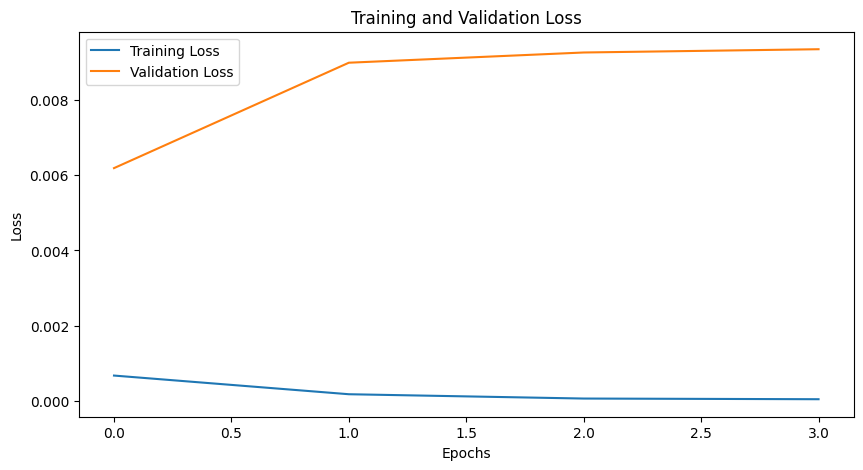

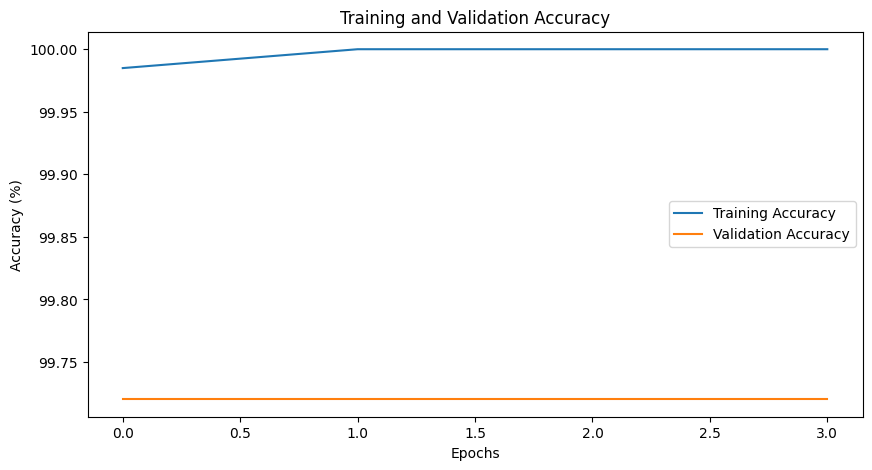

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


In [ ]:
# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(val_targets, val_preds))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       1.00      1.00      1.00       262

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



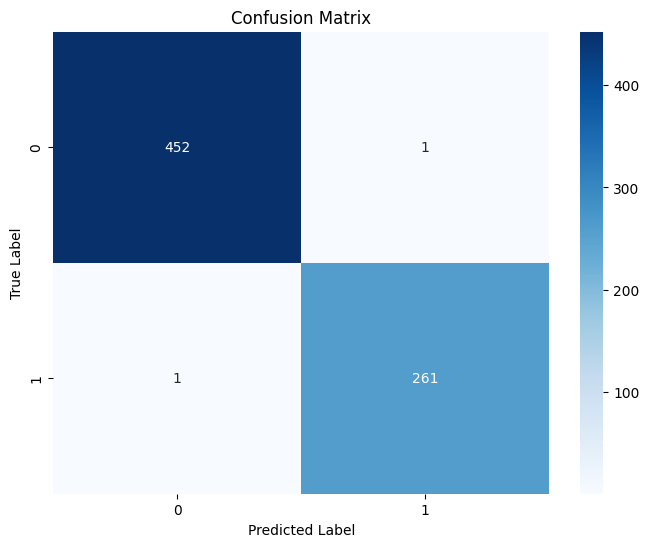

In [ ]:
# Confusion Matrix
cm = confusion_matrix(val_targets, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(val_targets), yticklabels=np.unique(val_targets))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Validation loop
GoogleNet_model.eval()  # Set model to evaluation mode
correct_predictions = 0
total_samples = 0

with torch.no_grad():  # Disable gradient calculation for validation
    # Use tqdm to show progress for the validation loop
    for images, labels in tqdm(test_loader, desc='Validation'):
        images, labels = images.to(device), labels.to(device)  # Move to device
        outputs = GoogleNet_model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total_samples += labels.size(0)  # Update total samples
        correct_predictions += (predicted == labels).sum().item()  # Update correct predictions

# Calculate test accuracy
test_accuracy = correct_predictions / total_samples
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Validation: 100%|██████████| 23/23 [00:02<00:00,  7.84it/s]

Test Accuracy: 99.72%


#InceptionV3

In [ ]:
import timm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os

In [ ]:
# Load InceptionV3 model for binary classification
inception_model = timm.create_model('inception_v3', pretrained=True, num_classes=2)
inception_model = inception_model.to(device)

model.safetensors:   0%|          | 0.00/95.5M [00:00<?, ?B/s]

In [ ]:
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
# Set up dataset and dataloader (same as before)
train_data_gen = XceptionDataGenerator(train_directory, transform=transform)
test_data_gen = XceptionDataGenerator(test_directory, transform=transform)

train_loader = DataLoader(train_data_gen, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data_gen, batch_size=32, shuffle=False)


In [ ]:
# Define optimizer and loss function
optimizer = torch.optim.AdamW(inception_model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Define a data generator class
class InceptionV3_DataGenerator(Dataset):
    def __init__(self, image_directory, transform=None):
        self.image_directory = image_directory
        self.transform = transform
        self.image_files = []
        self.labels = []

        for label, sub_dir in enumerate(['def_front', 'ok_front']):
            sub_dir_path = os.path.join(self.image_directory, sub_dir)
            if os.path.exists(sub_dir_path):
                for file in os.listdir(sub_dir_path):
                    file_path = os.path.join(sub_dir_path, file)
                    if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                        self.image_files.append(file_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        label = self.labels[idx]

        # Open image
        image = Image.open(image_path).convert("RGB")

        # Apply transformations (resize, normalize, etc.)
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)

In [ ]:
import torch
import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize variables for tracking metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

patience = 3
best_loss = float('inf')
patience_counter = 0

# Track the start time of the training
start_time = time.time()

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    inception_model.train()
    total_loss = 0
    correct_train = 0
    total_train_samples = 0

    # Use tqdm for progress bar
    for images, labels in tqdm(train_loader, desc=f'Training Epoch {epoch + 1}/{num_epochs}'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = inception_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs, 1)
        correct_train += (predicted_train == labels).sum().item()
        total_train_samples += labels.size(0)

    # Calculate and store the average training loss and accuracy
    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / total_train_samples
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy * 100:.2f}%')

    # Validation step
    inception_model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val_samples = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for val_images, val_labels in tqdm(test_loader, desc='Validating'):
            val_images, val_labels = val_images.to(device), val_labels.to(device)

            val_outputs = inception_model(val_images)
            val_loss = criterion(val_outputs, val_labels)
            total_val_loss += val_loss.item()

            # Calculate validation accuracy
            _, predicted_val = torch.max(val_outputs, 1)
            correct_val += (predicted_val == val_labels).sum().item()
            total_val_samples += val_labels.size(0)

            # Store all predictions and labels for confusion matrix and classification report
            all_preds.extend(predicted_val.cpu().numpy())
            all_labels.extend(val_labels.cpu().numpy())

    # Calculate and store the average validation loss and accuracy
    avg_val_loss = total_val_loss / len(test_loader)
    val_accuracy = correct_val / total_val_samples
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%')

    # Early stopping logic
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        patience_counter = 0  # Reset the counter
        print("Model improved, saving the model...")
        # Optionally save the model here
    else:
        patience_counter += 1
        print(f'EarlyStopping counter: {patience_counter} out of {patience}')

        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Track the end time of the training
end_time = time.time()
total_training_time = end_time - start_time

print(f'Total Training Time: {total_training_time:.2f} seconds')


Training Epoch 1/5: 100%|██████████| 208/208 [01:55<00:00,  1.80it/s]


Epoch [1/5], Loss: 0.0619, Training Accuracy: 97.87%


Validating: 100%|██████████| 23/23 [00:05<00:00,  4.23it/s]


Validation Loss: 0.0090, Validation Accuracy: 99.72%
Model improved, saving the model...


Training Epoch 2/5: 100%|██████████| 208/208 [01:56<00:00,  1.79it/s]


Epoch [2/5], Loss: 0.0144, Training Accuracy: 99.47%


Validating: 100%|██████████| 23/23 [00:06<00:00,  3.83it/s]


Validation Loss: 0.0078, Validation Accuracy: 99.72%
Model improved, saving the model...


Training Epoch 3/5: 100%|██████████| 208/208 [01:55<00:00,  1.80it/s]


Epoch [3/5], Loss: 0.0102, Training Accuracy: 99.70%


Validating: 100%|██████████| 23/23 [00:05<00:00,  4.27it/s]


Validation Loss: 0.0201, Validation Accuracy: 99.44%
EarlyStopping counter: 1 out of 3


Training Epoch 4/5: 100%|██████████| 208/208 [01:55<00:00,  1.80it/s]


Epoch [4/5], Loss: 0.0101, Training Accuracy: 99.73%


Validating: 100%|██████████| 23/23 [00:05<00:00,  3.89it/s]


Validation Loss: 0.0090, Validation Accuracy: 99.72%
EarlyStopping counter: 2 out of 3


Training Epoch 5/5: 100%|██████████| 208/208 [01:54<00:00,  1.81it/s]


Epoch [5/5], Loss: 0.0121, Training Accuracy: 99.56%


Validating: 100%|██████████| 23/23 [00:05<00:00,  4.30it/s]

Validation Loss: 0.0183, Validation Accuracy: 99.44%
EarlyStopping counter: 3 out of 3
Early stopping triggered.
Total Training Time: 605.96 seconds


In [ ]:
# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       0.99      0.99      0.99       262

    accuracy                           0.99       715
   macro avg       0.99      0.99      0.99       715
weighted avg       0.99      0.99      0.99       715



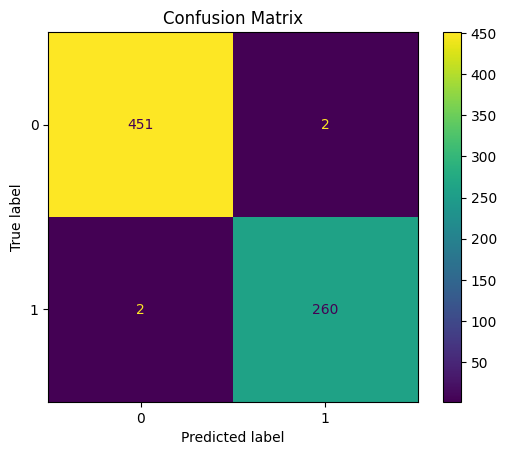

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

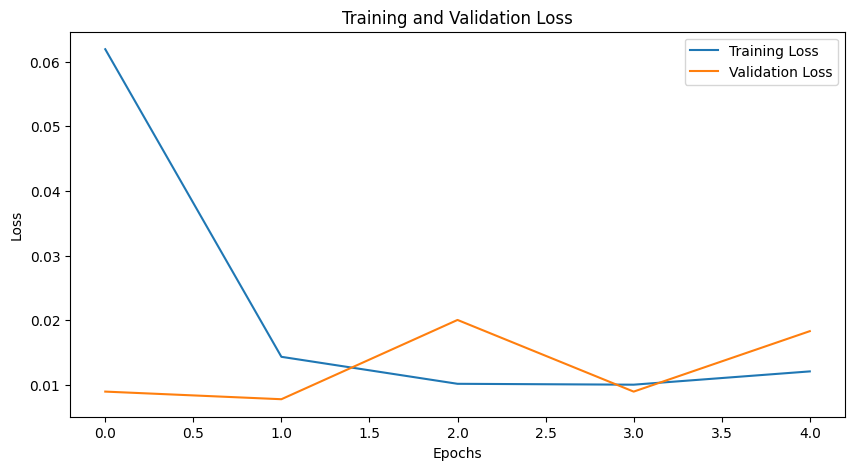

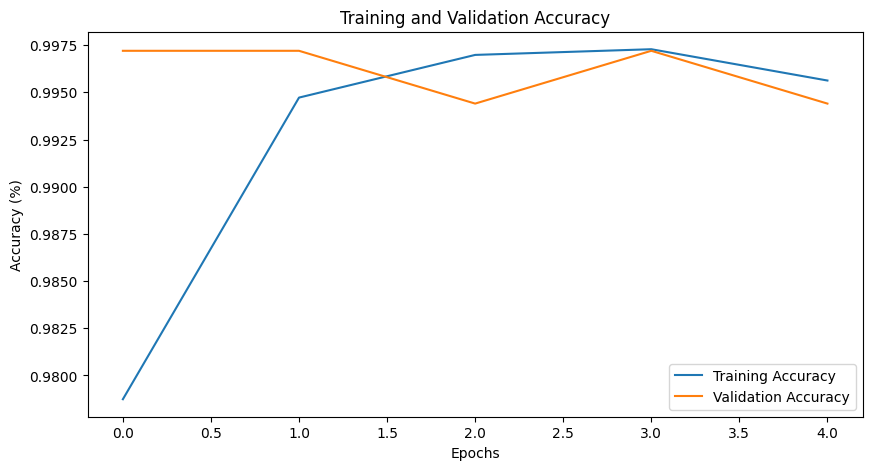

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [ ]:
# Testing loop
inception_model.eval()  # Set the model to evaluation mode
correct_predictions = 0
total_samples = 0

with torch.no_grad():
    # Use tqdm for progress bar during testing
    for images, labels in tqdm(test_loader, desc='Testing'):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = inception_model(images)

        # Get predicted classes
        _, predicted = torch.max(outputs, 1)

        # Update total samples and correct predictions
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

# Calculate accuracy
test_accuracy = correct_predictions / total_samples
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Testing: 100%|██████████| 23/23 [00:05<00:00,  4.04it/s]

Test Accuracy: 99.44%


# AlexNet

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 181MB/s]
Training Epoch 1/20: 100%|██████████| 208/208 [00:29<00:00,  7.13it/s]


Epoch [1/20], Training Loss: 0.4949, Training Accuracy: 76.39%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.40it/s]


Epoch [1/20], Validation Loss: 0.7775, Validation Accuracy: 82.80%


Training Epoch 2/20: 100%|██████████| 208/208 [00:28<00:00,  7.25it/s]


Epoch [2/20], Training Loss: 0.4504, Training Accuracy: 77.57%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.46it/s]


Epoch [2/20], Validation Loss: 0.5113, Validation Accuracy: 72.03%


Training Epoch 3/20: 100%|██████████| 208/208 [00:28<00:00,  7.17it/s]


Epoch [3/20], Training Loss: 0.4088, Training Accuracy: 81.74%


Validating: 100%|██████████| 23/23 [00:02<00:00,  8.80it/s]


Epoch [3/20], Validation Loss: 0.3360, Validation Accuracy: 88.95%


Training Epoch 4/20: 100%|██████████| 208/208 [00:28<00:00,  7.23it/s]


Epoch [4/20], Training Loss: 0.2315, Training Accuracy: 91.06%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.44it/s]


Epoch [4/20], Validation Loss: 0.0823, Validation Accuracy: 97.62%


Training Epoch 5/20: 100%|██████████| 208/208 [00:29<00:00,  7.13it/s]


Epoch [5/20], Training Loss: 0.1965, Training Accuracy: 92.85%


Validating: 100%|██████████| 23/23 [00:02<00:00,  8.02it/s]


Epoch [5/20], Validation Loss: 0.4773, Validation Accuracy: 77.48%


Training Epoch 6/20: 100%|██████████| 208/208 [00:28<00:00,  7.29it/s]


Epoch [6/20], Training Loss: 0.2638, Training Accuracy: 89.30%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.50it/s]


Epoch [6/20], Validation Loss: 0.0422, Validation Accuracy: 98.04%


Training Epoch 7/20: 100%|██████████| 208/208 [00:28<00:00,  7.21it/s]


Epoch [7/20], Training Loss: 0.1110, Training Accuracy: 96.50%


Validating: 100%|██████████| 23/23 [00:03<00:00,  7.46it/s]


Epoch [7/20], Validation Loss: 0.1215, Validation Accuracy: 95.24%


Training Epoch 8/20: 100%|██████████| 208/208 [00:28<00:00,  7.22it/s]


Epoch [8/20], Training Loss: 0.0976, Training Accuracy: 96.71%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.35it/s]


Epoch [8/20], Validation Loss: 0.0704, Validation Accuracy: 97.48%


Training Epoch 9/20: 100%|██████████| 208/208 [00:28<00:00,  7.23it/s]


Epoch [9/20], Training Loss: 0.0743, Training Accuracy: 97.68%


Validating: 100%|██████████| 23/23 [00:02<00:00,  8.26it/s]


Epoch [9/20], Validation Loss: 0.0311, Validation Accuracy: 99.44%


Training Epoch 10/20: 100%|██████████| 208/208 [00:28<00:00,  7.19it/s]


Epoch [10/20], Training Loss: 0.0764, Training Accuracy: 97.93%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.32it/s]


Epoch [10/20], Validation Loss: 0.0366, Validation Accuracy: 98.74%


Training Epoch 11/20: 100%|██████████| 208/208 [00:28<00:00,  7.17it/s]


Epoch [11/20], Training Loss: 0.1206, Training Accuracy: 96.76%


Validating: 100%|██████████| 23/23 [00:02<00:00,  9.25it/s]


Epoch [11/20], Validation Loss: 0.0165, Validation Accuracy: 99.58%


Training Epoch 12/20: 100%|██████████| 208/208 [00:29<00:00,  7.09it/s]


Epoch [12/20], Training Loss: 0.0682, Training Accuracy: 98.15%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.35it/s]


Epoch [12/20], Validation Loss: 0.0516, Validation Accuracy: 99.02%


Training Epoch 13/20: 100%|██████████| 208/208 [00:28<00:00,  7.19it/s]


Epoch [13/20], Training Loss: 0.0434, Training Accuracy: 98.73%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.48it/s]


Epoch [13/20], Validation Loss: 0.1612, Validation Accuracy: 94.13%


Training Epoch 14/20: 100%|██████████| 208/208 [00:29<00:00,  7.11it/s]


Epoch [14/20], Training Loss: 0.0743, Training Accuracy: 97.71%


Validating: 100%|██████████| 23/23 [00:02<00:00,  8.61it/s]


Epoch [14/20], Validation Loss: 0.0135, Validation Accuracy: 99.86%


Training Epoch 15/20: 100%|██████████| 208/208 [00:28<00:00,  7.29it/s]


Epoch [15/20], Training Loss: 0.0516, Training Accuracy: 98.76%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.51it/s]


Epoch [15/20], Validation Loss: 0.0911, Validation Accuracy: 98.60%


Training Epoch 16/20: 100%|██████████| 208/208 [00:28<00:00,  7.29it/s]


Epoch [16/20], Training Loss: 0.0429, Training Accuracy: 98.93%


Validating: 100%|██████████| 23/23 [00:03<00:00,  7.53it/s]


Epoch [16/20], Validation Loss: 0.0214, Validation Accuracy: 99.44%


Training Epoch 17/20: 100%|██████████| 208/208 [00:28<00:00,  7.23it/s]


Epoch [17/20], Training Loss: 0.0367, Training Accuracy: 99.13%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.41it/s]


Epoch [17/20], Validation Loss: 0.0169, Validation Accuracy: 99.58%


Training Epoch 18/20: 100%|██████████| 208/208 [00:28<00:00,  7.22it/s]


Epoch [18/20], Training Loss: 0.0299, Training Accuracy: 99.19%


Validating: 100%|██████████| 23/23 [00:02<00:00,  8.07it/s]


Epoch [18/20], Validation Loss: 0.0200, Validation Accuracy: 99.58%


Training Epoch 19/20: 100%|██████████| 208/208 [00:29<00:00,  7.12it/s]


Epoch [19/20], Training Loss: 0.0267, Training Accuracy: 99.35%


Validating: 100%|██████████| 23/23 [00:02<00:00, 10.39it/s]


Epoch [19/20], Validation Loss: 0.0103, Validation Accuracy: 99.44%


Training Epoch 20/20: 100%|██████████| 208/208 [00:28<00:00,  7.19it/s]


Epoch [20/20], Training Loss: 0.1028, Training Accuracy: 97.44%


Validating: 100%|██████████| 23/23 [00:02<00:00,  8.97it/s]


Epoch [20/20], Validation Loss: 0.0253, Validation Accuracy: 99.44%
Total Training Time: 627.56 seconds


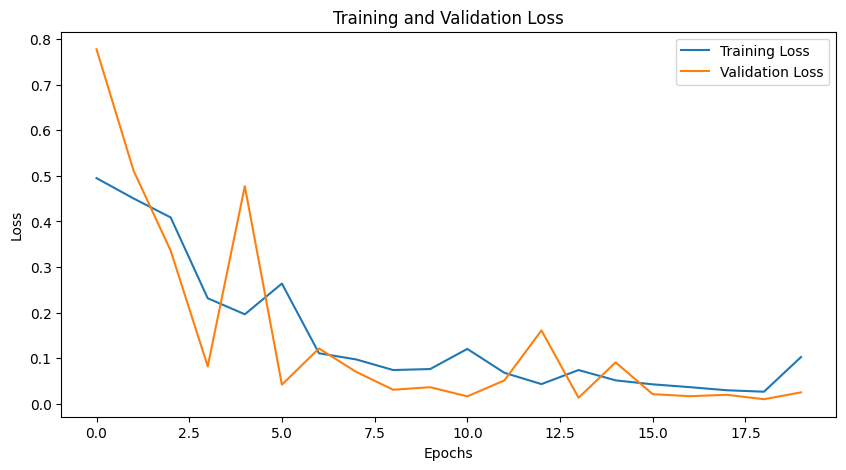

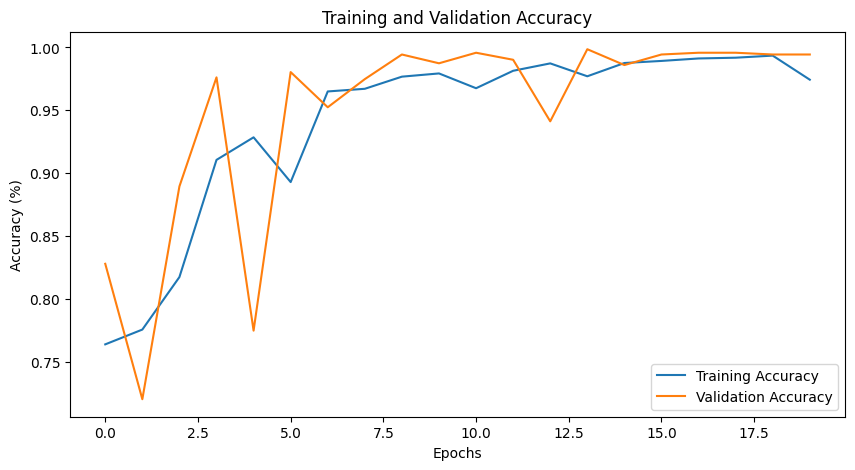

Evaluating: 100%|██████████| 23/23 [00:02<00:00,  8.79it/s]



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       0.99      0.99      0.99       262

    accuracy                           0.99       715
   macro avg       0.99      0.99      0.99       715
weighted avg       0.99      0.99      0.99       715



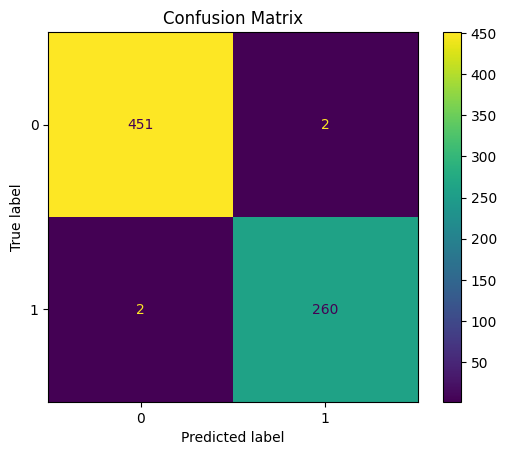

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

# Dataset Class
class CustomDataGenerator(Dataset):
    def __init__(self, image_directory, transform=None):
        self.image_directory = image_directory
        self.transform = transform
        self.image_files = []
        self.labels = []

        for label, sub_dir in enumerate(['def_front', 'ok_front']):
            sub_dir_path = os.path.join(self.image_directory, sub_dir)
            if os.path.exists(sub_dir_path):
                for file in os.listdir(sub_dir_path):
                    file_path = os.path.join(sub_dir_path, file)
                    if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                        self.image_files.append(file_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        label = self.labels[idx]

        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)

# Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Directories
train_directory = '/content/extracted_folder/casting_data/train'
test_directory = '/content/extracted_folder/casting_data/test'

train_data_gen = CustomDataGenerator(train_directory, transform=transform)
test_data_gen = CustomDataGenerator(test_directory, transform=transform)

train_loader = DataLoader(train_data_gen, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data_gen, batch_size=32, shuffle=False)

# Load AlexNet Pretrained Model
alexnet_model = models.alexnet(pretrained=True)
alexnet_model.classifier[6] = nn.Linear(4096, 2)  # Adjust for 2 classes

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet_model.to(device)

# Optimizer and Loss
optimizer = optim.Adam(alexnet_model.parameters(), lr=5e-4)
criterion = nn.CrossEntropyLoss()

# Training Loop
num_epochs = 20
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Track the start time of the training
start_time = time.time()

for epoch in range(num_epochs):
    alexnet_model.train()
    total_loss = 0
    correct_train = 0
    total_train_samples = 0

    for images, labels in tqdm(train_loader, desc=f'Training Epoch {epoch + 1}/{num_epochs}'):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = alexnet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs, 1)
        correct_train += (predicted_train == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = correct_train / total_train_samples
    train_accuracies.append(train_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy * 100:.2f}%')

    # Validation step
    alexnet_model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val_samples = 0

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Validating'):
            images, labels = images.to(device), labels.to(device)

            outputs = alexnet_model(images)
            val_loss = criterion(outputs, labels)
            total_val_loss += val_loss.item()

            # Calculate validation accuracy
            _, predicted_val = torch.max(outputs, 1)
            correct_val += (predicted_val == labels).sum().item()
            total_val_samples += labels.size(0)

    avg_val_loss = total_val_loss / len(test_loader)
    test_losses.append(avg_val_loss)
    val_accuracy = correct_val / total_val_samples
    test_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%')

# Track the end time of the training
end_time = time.time()
total_training_time = end_time - start_time
print(f'Total Training Time: {total_training_time:.2f} seconds')

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Evaluation: Classification Report and Confusion Matrix
alexnet_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Evaluating'):
        images, labels = images.to(device), labels.to(device)

        outputs = alexnet_model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()


# VGG16

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 64.5MB/s]
Training Epoch 1/10: 100%|██████████| 208/208 [01:53<00:00,  1.83it/s]


Epoch [1/10], Training Loss: 0.5567, Training Accuracy: 73.47%


Validating: 100%|██████████| 23/23 [00:05<00:00,  4.45it/s]


Epoch [1/10], Validation Loss: 0.3920, Validation Accuracy: 82.52%


Training Epoch 2/10: 100%|██████████| 208/208 [01:54<00:00,  1.82it/s]


Epoch [2/10], Training Loss: 0.3977, Training Accuracy: 85.90%


Validating: 100%|██████████| 23/23 [00:06<00:00,  3.70it/s]


Epoch [2/10], Validation Loss: 0.2731, Validation Accuracy: 90.07%


Training Epoch 3/10: 100%|██████████| 208/208 [01:53<00:00,  1.83it/s]


Epoch [3/10], Training Loss: 0.3696, Training Accuracy: 86.54%


Validating: 100%|██████████| 23/23 [00:05<00:00,  4.05it/s]


Epoch [3/10], Validation Loss: 0.2323, Validation Accuracy: 90.77%


Training Epoch 4/10: 100%|██████████| 208/208 [01:53<00:00,  1.83it/s]


Epoch [4/10], Training Loss: 0.1753, Training Accuracy: 94.77%


Validating: 100%|██████████| 23/23 [00:05<00:00,  4.08it/s]


Epoch [4/10], Validation Loss: 0.0790, Validation Accuracy: 97.62%


Training Epoch 5/10: 100%|██████████| 208/208 [01:52<00:00,  1.85it/s]


Epoch [5/10], Training Loss: 0.2038, Training Accuracy: 94.17%


Validating: 100%|██████████| 23/23 [00:05<00:00,  4.49it/s]


Epoch [5/10], Validation Loss: 0.1841, Validation Accuracy: 92.73%


Training Epoch 6/10: 100%|██████████| 208/208 [01:52<00:00,  1.85it/s]


Epoch [6/10], Training Loss: 0.0677, Training Accuracy: 98.21%


Validating: 100%|██████████| 23/23 [00:05<00:00,  4.08it/s]


Epoch [6/10], Validation Loss: 0.0504, Validation Accuracy: 98.46%


Training Epoch 7/10: 100%|██████████| 208/208 [01:52<00:00,  1.85it/s]


Epoch [7/10], Training Loss: 0.0453, Training Accuracy: 98.78%


Validating: 100%|██████████| 23/23 [00:05<00:00,  4.16it/s]


Epoch [7/10], Validation Loss: 0.0411, Validation Accuracy: 99.30%


Training Epoch 8/10: 100%|██████████| 208/208 [01:52<00:00,  1.86it/s]


Epoch [8/10], Training Loss: 0.0870, Training Accuracy: 98.18%


Validating: 100%|██████████| 23/23 [00:06<00:00,  3.77it/s]


Epoch [8/10], Validation Loss: 0.0538, Validation Accuracy: 98.46%


Training Epoch 9/10: 100%|██████████| 208/208 [01:51<00:00,  1.86it/s]


Epoch [9/10], Training Loss: 0.0475, Training Accuracy: 98.78%


Validating: 100%|██████████| 23/23 [00:05<00:00,  4.09it/s]


Epoch [9/10], Validation Loss: 0.0870, Validation Accuracy: 99.02%


Training Epoch 10/10: 100%|██████████| 208/208 [01:51<00:00,  1.86it/s]


Epoch [10/10], Training Loss: 0.0334, Training Accuracy: 99.10%


Validating: 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]


Epoch [10/10], Validation Loss: 0.0103, Validation Accuracy: 99.72%
Total Training Time: 1184.90 seconds


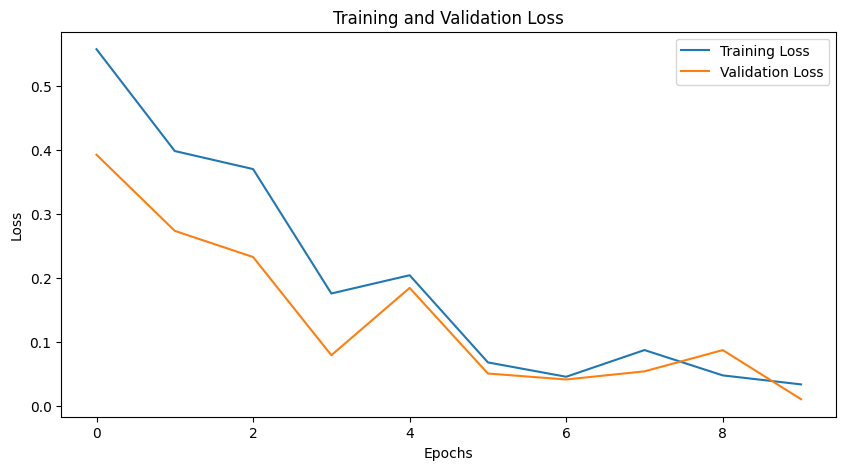

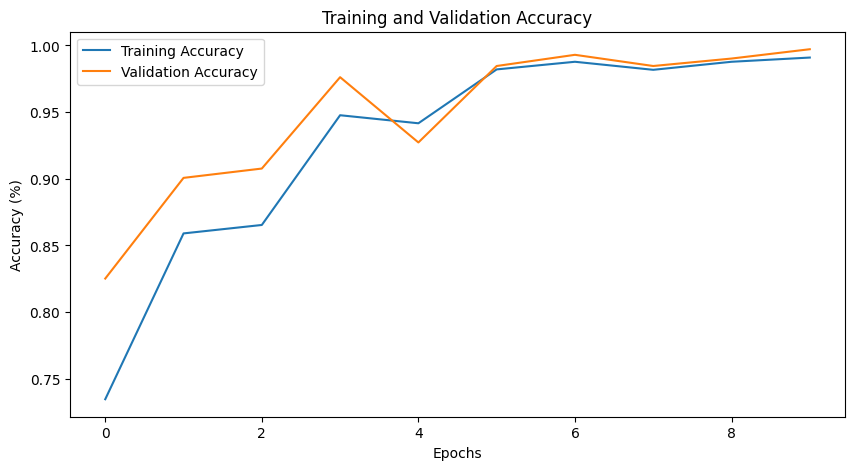

Evaluating: 100%|██████████| 23/23 [00:05<00:00,  4.45it/s]



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       0.99      1.00      1.00       262

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



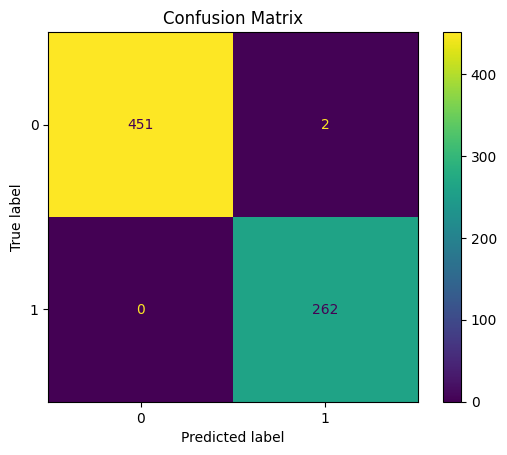

Test Accuracy: 99.72%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

# Dataset Class (Same as in AlexNet)
class CustomDataGenerator(Dataset):
    def __init__(self, image_directory, transform=None):
        self.image_directory = image_directory
        self.transform = transform
        self.image_files = []
        self.labels = []

        for label, sub_dir in enumerate(['def_front', 'ok_front']):
            sub_dir_path = os.path.join(self.image_directory, sub_dir)
            if os.path.exists(sub_dir_path):
                for file in os.listdir(sub_dir_path):
                    file_path = os.path.join(sub_dir_path, file)
                    if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                        self.image_files.append(file_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        label = self.labels[idx]

        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)

# Image Transformations (Same as in AlexNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Directories
train_directory = '/content/extracted_folder/casting_data/train'
test_directory = '/content/extracted_folder/casting_data/test'

train_data_gen = CustomDataGenerator(train_directory, transform=transform)
test_data_gen = CustomDataGenerator(test_directory, transform=transform)

train_loader = DataLoader(train_data_gen, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data_gen, batch_size=32, shuffle=False)

# Load VGG16 Pretrained Model
vgg16_model = models.vgg16(pretrained=True)
vgg16_model.classifier[6] = nn.Linear(4096, 2)  # Adjust for 2 classes

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16_model.to(device)

# Optimizer and Loss
optimizer = optim.Adam(vgg16_model.parameters(), lr=5e-4)
criterion = nn.CrossEntropyLoss()

# Training Loop
num_epochs = 10
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Track the start time of the training
start_time = time.time()

for epoch in range(num_epochs):
    vgg16_model.train()
    total_loss = 0
    correct_train = 0
    total_train_samples = 0

    for images, labels in tqdm(train_loader, desc=f'Training Epoch {epoch + 1}/{num_epochs}'):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = vgg16_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs, 1)
        correct_train += (predicted_train == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = correct_train / total_train_samples
    train_accuracies.append(train_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy * 100:.2f}%')

    # Validation step
    vgg16_model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val_samples = 0

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Validating'):
            images, labels = images.to(device), labels.to(device)

            outputs = vgg16_model(images)
            val_loss = criterion(outputs, labels)
            total_val_loss += val_loss.item()

            # Calculate validation accuracy
            _, predicted_val = torch.max(outputs, 1)
            correct_val += (predicted_val == labels).sum().item()
            total_val_samples += labels.size(0)

    avg_val_loss = total_val_loss / len(test_loader)
    test_losses.append(avg_val_loss)
    val_accuracy = correct_val / total_val_samples
    test_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%')

# Track the end time of the training
end_time = time.time()
total_training_time = end_time - start_time
print(f'Total Training Time: {total_training_time:.2f} seconds')

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Evaluation: Classification Report and Confusion Matrix
vgg16_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Evaluating'):
        images, labels = images.to(device), labels.to(device)

        outputs = vgg16_model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

# Test Accuracy
test_accuracy = correct_val / total_val_samples
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


#  DenseNet

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:01<00:00, 17.3MB/s]
Training Epoch 1/5: 100%|██████████| 208/208 [01:24<00:00,  2.47it/s]


Epoch [1/5], Training Loss: 0.0510, Training Accuracy: 98.36%


Validating: 100%|██████████| 23/23 [00:04<00:00,  5.62it/s]


Epoch [1/5], Validation Loss: 0.0183, Validation Accuracy: 99.44%


Training Epoch 2/5: 100%|██████████| 208/208 [01:24<00:00,  2.46it/s]


Epoch [2/5], Training Loss: 0.0244, Training Accuracy: 99.22%


Validating: 100%|██████████| 23/23 [00:04<00:00,  5.66it/s]


Epoch [2/5], Validation Loss: 0.0184, Validation Accuracy: 99.30%


Training Epoch 3/5: 100%|██████████| 208/208 [01:23<00:00,  2.48it/s]


Epoch [3/5], Training Loss: 0.0163, Training Accuracy: 99.53%


Validating: 100%|██████████| 23/23 [00:03<00:00,  5.78it/s]


Epoch [3/5], Validation Loss: 0.0099, Validation Accuracy: 99.72%


Training Epoch 4/5: 100%|██████████| 208/208 [01:24<00:00,  2.47it/s]


Epoch [4/5], Training Loss: 0.0089, Training Accuracy: 99.71%


Validating: 100%|██████████| 23/23 [00:04<00:00,  5.58it/s]


Epoch [4/5], Validation Loss: 0.0039, Validation Accuracy: 99.86%


Training Epoch 5/5: 100%|██████████| 208/208 [01:25<00:00,  2.43it/s]


Epoch [5/5], Training Loss: 0.0118, Training Accuracy: 99.71%


Validating: 100%|██████████| 23/23 [00:04<00:00,  5.62it/s]


Epoch [5/5], Validation Loss: 0.0153, Validation Accuracy: 99.58%
Total Training Time: 442.47 seconds


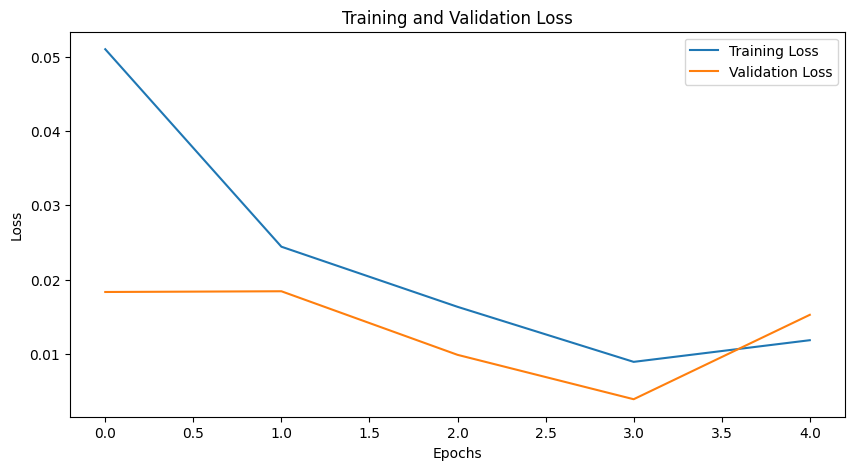

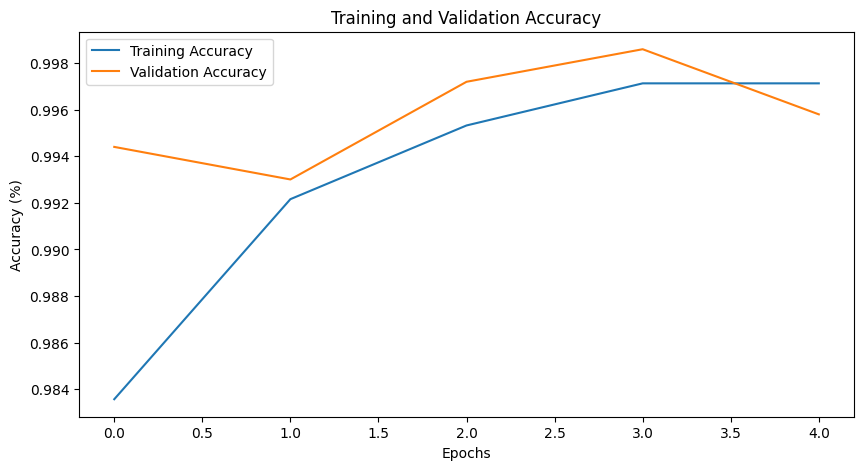

Evaluating: 100%|██████████| 23/23 [00:04<00:00,  5.44it/s]



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       453
           1       0.99      1.00      0.99       262

    accuracy                           1.00       715
   macro avg       0.99      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



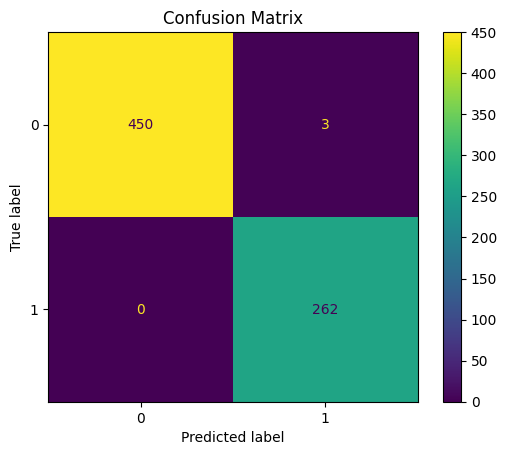

Test Accuracy: 99.58%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

# Dataset Class (Same as in AlexNet)
class CustomDataGenerator(Dataset):
    def __init__(self, image_directory, transform=None):
        self.image_directory = image_directory
        self.transform = transform
        self.image_files = []
        self.labels = []

        for label, sub_dir in enumerate(['def_front', 'ok_front']):
            sub_dir_path = os.path.join(self.image_directory, sub_dir)
            if os.path.exists(sub_dir_path):
                for file in os.listdir(sub_dir_path):
                    file_path = os.path.join(sub_dir_path, file)
                    if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                        self.image_files.append(file_path)
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        label = self.labels[idx]

        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)

# Image Transformations (Same as in AlexNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Directories
train_directory = '/content/extracted_folder/casting_data/train'
test_directory = '/content/extracted_folder/casting_data/test'

train_data_gen = CustomDataGenerator(train_directory, transform=transform)
test_data_gen = CustomDataGenerator(test_directory, transform=transform)

train_loader = DataLoader(train_data_gen, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data_gen, batch_size=32, shuffle=False)

# Load DenseNet Pretrained Model
densenet_model = models.densenet121(pretrained=True)
densenet_model.classifier = nn.Linear(1024, 2)  # Adjust for 2 classes

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
densenet_model.to(device)

# Optimizer and Loss
optimizer = optim.Adam(densenet_model.parameters(), lr=5e-4)
criterion = nn.CrossEntropyLoss()

# Training Loop
num_epochs = 5
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Track the start time of the training
start_time = time.time()

for epoch in range(num_epochs):
    densenet_model.train()
    total_loss = 0
    correct_train = 0
    total_train_samples = 0

    for images, labels in tqdm(train_loader, desc=f'Training Epoch {epoch + 1}/{num_epochs}'):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = densenet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs, 1)
        correct_train += (predicted_train == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = correct_train / total_train_samples
    train_accuracies.append(train_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy * 100:.2f}%')

    # Validation step
    densenet_model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val_samples = 0

    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Validating'):
            images, labels = images.to(device), labels.to(device)

            outputs = densenet_model(images)
            val_loss = criterion(outputs, labels)
            total_val_loss += val_loss.item()

            # Calculate validation accuracy
            _, predicted_val = torch.max(outputs, 1)
            correct_val += (predicted_val == labels).sum().item()
            total_val_samples += labels.size(0)

    avg_val_loss = total_val_loss / len(test_loader)
    test_losses.append(avg_val_loss)
    val_accuracy = correct_val / total_val_samples
    test_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%')

# Track the end time of the training
end_time = time.time()
total_training_time = end_time - start_time
print(f'Total Training Time: {total_training_time:.2f} seconds')

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Evaluation: Classification Report and Confusion Matrix
densenet_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Evaluating'):
        images, labels = images.to(device), labels.to(device)

        outputs = densenet_model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

# Test Accuracy
test_accuracy = correct_val / total_val_samples
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
